In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [2]:
def printaccuracy(y_test,predict):
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))

In [3]:
def normalizedata(X):
    SS = StandardScaler()
    X = SS.fit_transform(X)
    print("Normalization done")
    

In [4]:
def removeoutliers(data,inplace=False):
    prev_rows = len(data)
    data_copy = data.copy()
    z_score = np.abs(stats.zscore(data_copy))
    data_copy = data_copy[(z_score < 3).all(axis=1)]
    if inplace:
        data=data_copy
    print("Before removing outliers , rows - ", prev_rows)
    print("After removing outliers , rows -", len(data_copy))
    print("Number of records deleted - ", (prev_rows - len(data_copy)))

In [5]:
col = ['ID Number','Diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal dimension'
,'radius2','texture2','perimeter2','area2','smoothness2','compactness2','concavity2','concave points2','symmetry2','fractal dimension2'
,'radius3','texture3','perimeter3','area3','smoothness3','compactness3','concavity3','concave points3','symmetry3','fractal dimension3']

In [6]:
data = pd.read_csv('wdbc.data',error_bad_lines=False)
data.columns = col

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
ID Number             568 non-null int64
Diagnosis             568 non-null object
radius                568 non-null float64
texture               568 non-null float64
perimeter             568 non-null float64
area                  568 non-null float64
smoothness            568 non-null float64
compactness           568 non-null float64
concavity             568 non-null float64
concave points        568 non-null float64
symmetry              568 non-null float64
fractal dimension     568 non-null float64
radius2               568 non-null float64
texture2              568 non-null float64
perimeter2            568 non-null float64
area2                 568 non-null float64
smoothness2           568 non-null float64
compactness2          568 non-null float64
concavity2            568 non-null float64
concave points2       568 non-null float64
symmetry2             568 non-null flo

In [8]:
data.describe()

,ID Number,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
count,5.680000e+02,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,3.042382e+07,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,1.251246e+08,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692225e+05,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,9.061570e+05,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,8.825022e+06,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
data.drop('ID Number',axis=1,inplace=True)

In [10]:
data['Diagnosis'] = pd.Categorical(data['Diagnosis']).codes

In [11]:
removeoutliers(data,inplace=True)

Before removing outliers , rows -  568
After removing outliers , rows - 494
Number of records deleted -  74


In [12]:
X = data.drop('Diagnosis',axis=1)
y= data['Diagnosis']

In [13]:
normalizedata(X)

Normalization done


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [15]:
lr = LogisticRegression(solver='lbfgs',max_iter=10000)

In [16]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
lr_predict = lr.predict(X_test)

In [18]:
maxiter={'max_iter':np.array(range(100,10000,100))}

In [19]:
lr_grid=GridSearchCV(LogisticRegression(solver='lbfgs'),maxiter,verbose=0,refit=True,cv=3)

In [20]:
#lr_grid.fit(X_train,y_train)

In [21]:
#lr_grid_predict = lr_grid.predict(X_test)

In [22]:
printaccuracy(y_test,lr_predict)

[[111   3]
 [  7  50]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       114
           1       0.94      0.88      0.91        57

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [23]:
def k_vs_error_graph():
    knn_error = []
    for i in range(2,50):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        knn_predict= knn.predict(X_test)
        knn_error.append(np.mean(y_test!=knn_predict))
    plt.plot(range(2,50),knn_error)
    plt.xlabel("K value")
    plt.ylabel("Error")
    
    

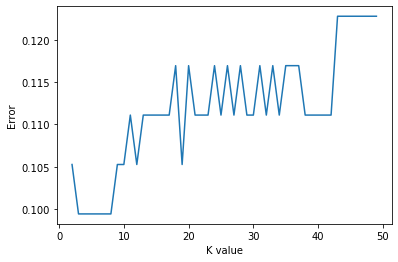

In [24]:
k_vs_error_graph()

In [25]:
neighbors={'n_neighbors':np.array(range(2,50))}

In [26]:
knn_grid=GridSearchCV(KNeighborsClassifier(),neighbors,verbose=4,refit=True,cv=3)

In [27]:
knn_grid.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.947, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.955, total=   0.0s
[CV] n_neighbors=2 ...................................................
[CV] ....................... n_neighbors=2, score=0.894, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.940, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.970, total=   0.0s
[CV] n_neighbors=3 ...................................................
[CV] ....................... n_neighbors=3, score=0.902, total=   0.0s
[CV] n_neighbors=4 ...................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... n_neighbors=10, score=0.962, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.962, total=   0.0s
[CV] n_neighbors=10 ..................................................
[CV] ...................... n_neighbors=10, score=0.902, total=   0.0s
[CV] n_neighbors=11 ..................................................
[CV] ...................... n_neighbors=11, score=0.962, total=   0.0s
[CV] n_neighbors=11 ..................................................
[CV] ...................... n_neighbors=11, score=0.962, total=   0.0s
[CV] n_neighbors=11 ..................................................
[CV] ...................... n_neighbors=11, score=0.902, total=   0.0s
[CV] n_neighbors=12 ..................................................
[CV] ...................... n_neighbors=12, score=0.962, total=   0.0s
[CV] n_neighbors=12 ..................................................
[CV] .

[CV] ...................... n_neighbors=33, score=0.940, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ...................... n_neighbors=33, score=0.939, total=   0.0s
[CV] n_neighbors=33 ..................................................
[CV] ...................... n_neighbors=33, score=0.894, total=   0.0s
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.932, total=   0.0s
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.947, total=   0.0s
[CV] n_neighbors=34 ..................................................
[CV] ...................... n_neighbors=34, score=0.902, total=   0.0s
[CV] n_neighbors=35 ..................................................
[CV] ...................... n_neighbors=35, score=0.940, total=   0.0s
[CV] n_neighbors=35 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    1.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [28]:
knn_grid.best_params_

{'n_neighbors': 5}

In [29]:
knn_predict = knn_grid.predict(X_test)

In [30]:
printaccuracy(y_test,knn_predict)

[[107   7]
 [ 10  47]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       114
           1       0.87      0.82      0.85        57

    accuracy                           0.90       171
   macro avg       0.89      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171



In [31]:
# SVM

In [32]:
svm = SVC(kernel='rbf')

In [33]:
params = { 'C' : np.logspace(0, 3, 4), 'gamma' : np.logspace(-2, 1, 4)}
svm_grid = GridSearchCV(svm, params, verbose=1, cv=3,return_train_score=True)

In [34]:
svm_grid.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([   1.,   10.,  100., 1000.]),
                         'gamma': array([ 0.01,  0.1 ,  1.  , 10.  ])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=1)

In [35]:
svm_predict = svm_grid.predict(X_test)

In [36]:
svm_grid.best_params_

{'C': 1.0, 'gamma': 0.01}

In [37]:
svm_grid.best_score_

0.6120906801007556

In [38]:
printaccuracy(y_test,svm_predict)

[[114   0]
 [ 56   1]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       114
           1       1.00      0.02      0.03        57

    accuracy                           0.67       171
   macro avg       0.84      0.51      0.42       171
weighted avg       0.78      0.67      0.55       171



In [39]:
X_train.iloc[0:5]

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave points3,symmetry3,fractal dimension3
68,12.780,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.02864,0.1590,0.05653,...,13.46,19.76,85.67,554.9,0.1296,0.07061,0.10390,0.05882,0.2383,0.06410
82,19.100,26.29,129.10,1132.0,0.12150,0.17910,0.19370,0.14690,0.1634,0.07224,...,20.33,32.72,141.30,1298.0,0.1392,0.28170,0.24320,0.18410,0.2311,0.09203
564,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
124,13.850,17.21,88.44,588.7,0.08785,0.06136,0.01420,0.01141,0.1614,0.05890,...,15.49,23.58,100.30,725.9,0.1157,0.13500,0.08115,0.05104,0.2364,0.07182
415,9.405,21.70,59.60,271.2,0.10440,0.06159,0.02047,0.01257,0.2025,0.06601,...,10.85,31.24,68.73,359.4,0.1526,0.11930,0.06141,0.03770,0.2872,0.08304


In [40]:
#DT

In [41]:
dt = DecisionTreeClassifier()

In [42]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [43]:
dt_predict = dt.predict(X_test)

In [44]:
printaccuracy(y_test,dt_predict)

[[106   8]
 [  6  51]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       114
           1       0.86      0.89      0.88        57

    accuracy                           0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



In [45]:
#RF

In [46]:
rf = RandomForestClassifier()

In [47]:
params = { 'n_estimators' : np.arange(10,100,10), 'max_depth' : np.arange(5,50,5)}
rf_grid = GridSearchCV(rf, params, verbose=1, cv=3)

In [48]:
rf_grid.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=1)]: Done 243 out of 243 | elapsed:   16.8s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [49]:
rf_predict = rf_grid.predict(X_test)

In [50]:
printaccuracy(y_test,rf_predict)

[[109   5]
 [  7  50]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       114
           1       0.91      0.88      0.89        57

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



In [51]:
#Adaboost

In [52]:
ab = AdaBoostClassifier()

In [53]:
params = { 'n_estimators' : np.arange(10,100,10)}
ab_grid = GridSearchCV(ab, params, verbose=1, cv=3)

In [54]:
ab_grid.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    2.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [55]:
ab_predict = ab_grid.predict(X_test)

In [56]:
printaccuracy(y_test,ab_predict)

[[113   1]
 [  5  52]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       114
           1       0.98      0.91      0.95        57

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



In [57]:
#GNB

In [58]:
gnb = GaussianNB()

In [59]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
gnb_predict = gnb.predict(X_test)

In [61]:
printaccuracy(y_test,gnb_predict)

[[110   4]
 [  8  49]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       114
           1       0.92      0.86      0.89        57

    accuracy                           0.93       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



In [62]:
# NN

In [63]:
nn = MLPClassifier(solver='sgd')

In [69]:
params = {
    'hidden_layer_sizes': np.arange(10,100,20),
    'learning_rate': ['constant','adaptive'],
    'max_iter': np.arange(40,200,10)
}
#'hidden_layer_sizes': [(100,50), (50,20), (20,10)],
# 'activation': ['tanh', 'relu'],
# 'alpha': 10.0 ** -np.arange(1, 5),
#'solver': ['sgd', 'adam'],

In [70]:
nn_grid = GridSearchCV(nn, params, cv=3)

In [71]:
nn_grid.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converge

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Converg

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (120) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (140) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: Conve

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...one, shuffle=True,
                                     solver='sgd', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'hidden_layer_sizes': array([10, 30, 50, 70

In [72]:
nn_predict = nn_grid.predict(X_test)

In [74]:
printaccuracy(y_test,nn_predict)

[[114   0]
 [ 57   0]]
              precision    recall  f1-score   support

           0       0.67      1.00      0.80       114
           1       0.00      0.00      0.00        57

    accuracy                           0.67       171
   macro avg       0.33      0.50      0.40       171
weighted avg       0.44      0.67      0.53       171



In [75]:
nn_grid.best_params_

{'hidden_layer_sizes': 90, 'learning_rate': 'adaptive', 'max_iter': 180}

In [76]:
nn_grid.best_score_

0.9193954659949622

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=90, learning_rate='adaptive',
              learning_rate_init=0.001, max_iter=180, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)